## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
X_train=pd.read_csv("/content/drive/MyDrive/PD Model/Train_Data_Modified/X_train2_data.csv")
X_test=pd.read_csv("/content/drive/MyDrive/PD Model/Train_Data_Modified/X_test2_data.csv")
y_train=pd.read_csv("/content/drive/MyDrive/PD Model/Train_Data_Modified/y_train2_data.csv")
y_test=pd.read_csv("/content/drive/MyDrive/PD Model/Train_Data_Modified/y_test2_data.csv")

In [5]:
#Sanity check
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1493448, 384)
(1493448, 2)
(497817, 384)
(497817, 2)


In [6]:
X_train.columns

Index(['Unnamed: 0', 'funded_amnt_(1000.0_13125.0)',
       'funded_amnt_(13150.0_40000.0)', 'funded_amnt_inv_(725.0_13125.0)',
       'funded_amnt_inv_(13150.0_40000.0)', 'int_rate_(5.31_6.99)',
       'int_rate_(7.02_7.97)', 'int_rate_(7.99_9.44)', 'int_rate_(9.49_10.49)',
       'int_rate_(10.56_11.49)',
       ...
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w', 'application_type_Individual',
       'application_type_Joint App', 'disbursement_method_Cash',
       'disbursement_method_DirectPay'],
      dtype='object', length=384)

In [ ]:
y_train.columns

Index(['Unnamed: 0', 'good_bad'], dtype='object')

In [7]:
X_test.columns

Index(['Unnamed: 0', 'funded_amnt_(1000.0_13125.0)',
       'funded_amnt_(13150.0_40000.0)', 'funded_amnt_inv_(725.0_13125.0)',
       'funded_amnt_inv_(13150.0_40000.0)', 'int_rate_(5.31_6.99)',
       'int_rate_(7.02_7.97)', 'int_rate_(7.99_9.44)', 'int_rate_(9.49_10.49)',
       'int_rate_(10.56_11.49)',
       ...
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w', 'application_type_Individual',
       'application_type_Joint App', 'disbursement_method_Cash',
       'disbursement_method_DirectPay'],
      dtype='object', length=384)

In [7]:
X_test.columns

Index(['Unnamed: 0', 'funded_amnt_(1000.0_13125.0)',
       'funded_amnt_(13150.0_40000.0)', 'funded_amnt_inv_(725.0_13125.0)',
       'funded_amnt_inv_(13150.0_40000.0)', 'int_rate_(5.31_6.99)',
       'int_rate_(7.02_7.97)', 'int_rate_(7.99_9.44)', 'int_rate_(9.49_10.49)',
       'int_rate_(10.56_11.49)',
       ...
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_f',
       'initial_list_status_w', 'application_type_Individual',
       'application_type_Joint App', 'disbursement_method_Cash',
       'disbursement_method_DirectPay'],
      dtype='object', length=384)

In [6]:
X_train=X_train.drop("Unnamed: 0",axis=1)
y_train=y_train.drop("Unnamed: 0",axis=1)
X_test=X_test.drop("Unnamed: 0",axis=1)
y_test=y_test.drop("Unnamed: 0",axis=1)

In [7]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

# PD Model Fitting


We will use sklearn's logistic regression class to train our PD model

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression() #c=1 default we can set 0.01 or 100

# fit the model
logreg.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(logreg.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test,y_test)))

Accuracy on training set: 0.934
Accuracy on test set: 0.933


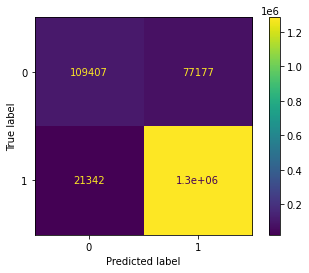

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_train, y_train)  
plt.show()

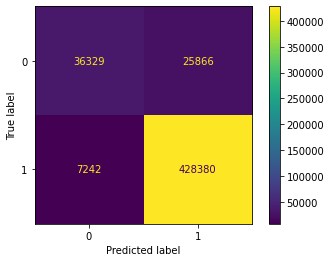

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)  
plt.show()

In [ ]:
y_pred=logreg.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.9294057428096665
Recall: 0.9334936332025624
F1 Score: 0.9283341395492588


In [ ]:
import pickle

Pkl_Filename = "PD2_LR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 15, n_estimators= 300,random_state=42)

gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)))

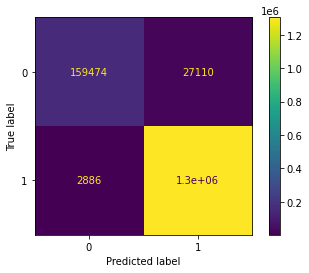

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbrt, X_train, y_train)  
plt.show()

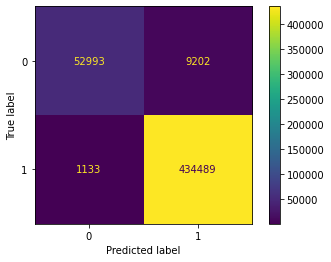

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbrt, X_test, y_test)  
plt.show()

In [ ]:
y_pred=gbrt.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.9792362310776606
Recall: 0.9792393590415756
F1 Score: 0.9786145477912732


In [ ]:
import pickle

Pkl_Filename = "Pickle_GB_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(gbrt, file)

In [10]:
from xgboost.sklearn import XGBClassifier
xgb= XGBClassifier(
 learning_rate= 0.2,
 max_depth= 15,
 n_estimators=100,random_state=42)

xgb.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(xgb.score(X_train,y_train))) 
print("Accuracy on test set: {:.3f}".format(xgb.score(X_test,y_test)))

Accuracy on training set: 0.970
Accuracy on test set: 0.939


AttributeError: ignored

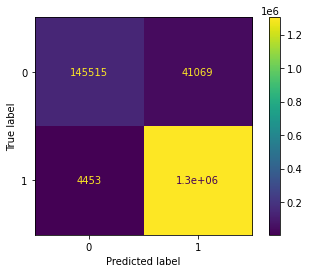

In [11]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_train, y_train)  
plt.show()

AttributeError: ignored

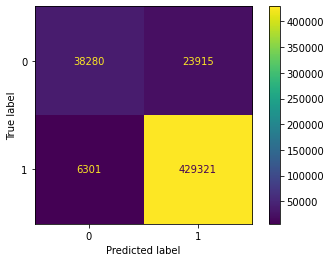

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()

In [13]:
import pickle

Pkl_Filename = "Pickle_XGB_PD2_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb, file)

In [14]:
import matplotlib.pyplot as plt
feature_importance = xgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 70))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

NameError: ignored

In [8]:
from xgboost.sklearn import XGBClassifier
xgb2= XGBClassifier(
 learning_rate= 0.1,
 max_depth= 7,
 n_estimators=100,random_state=42)

xgb2.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(xgb2.score(X_train,y_train))) 
print("Accuracy on test set: {:.3f}".format(xgb2.score(X_test,y_test)))

Accuracy on training set: 0.941
Accuracy on test set: 0.940


AttributeError: ignored

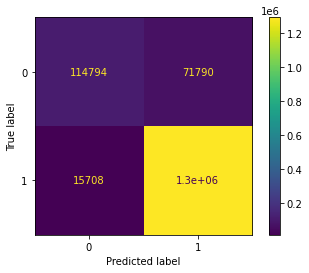

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb2, X_train, y_train)  
plt.show()

AttributeError: ignored

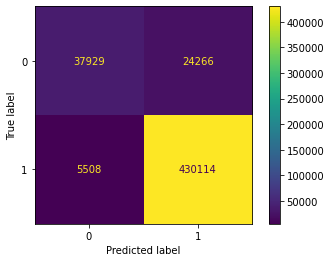

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb2, X_test, y_test)  
plt.show()

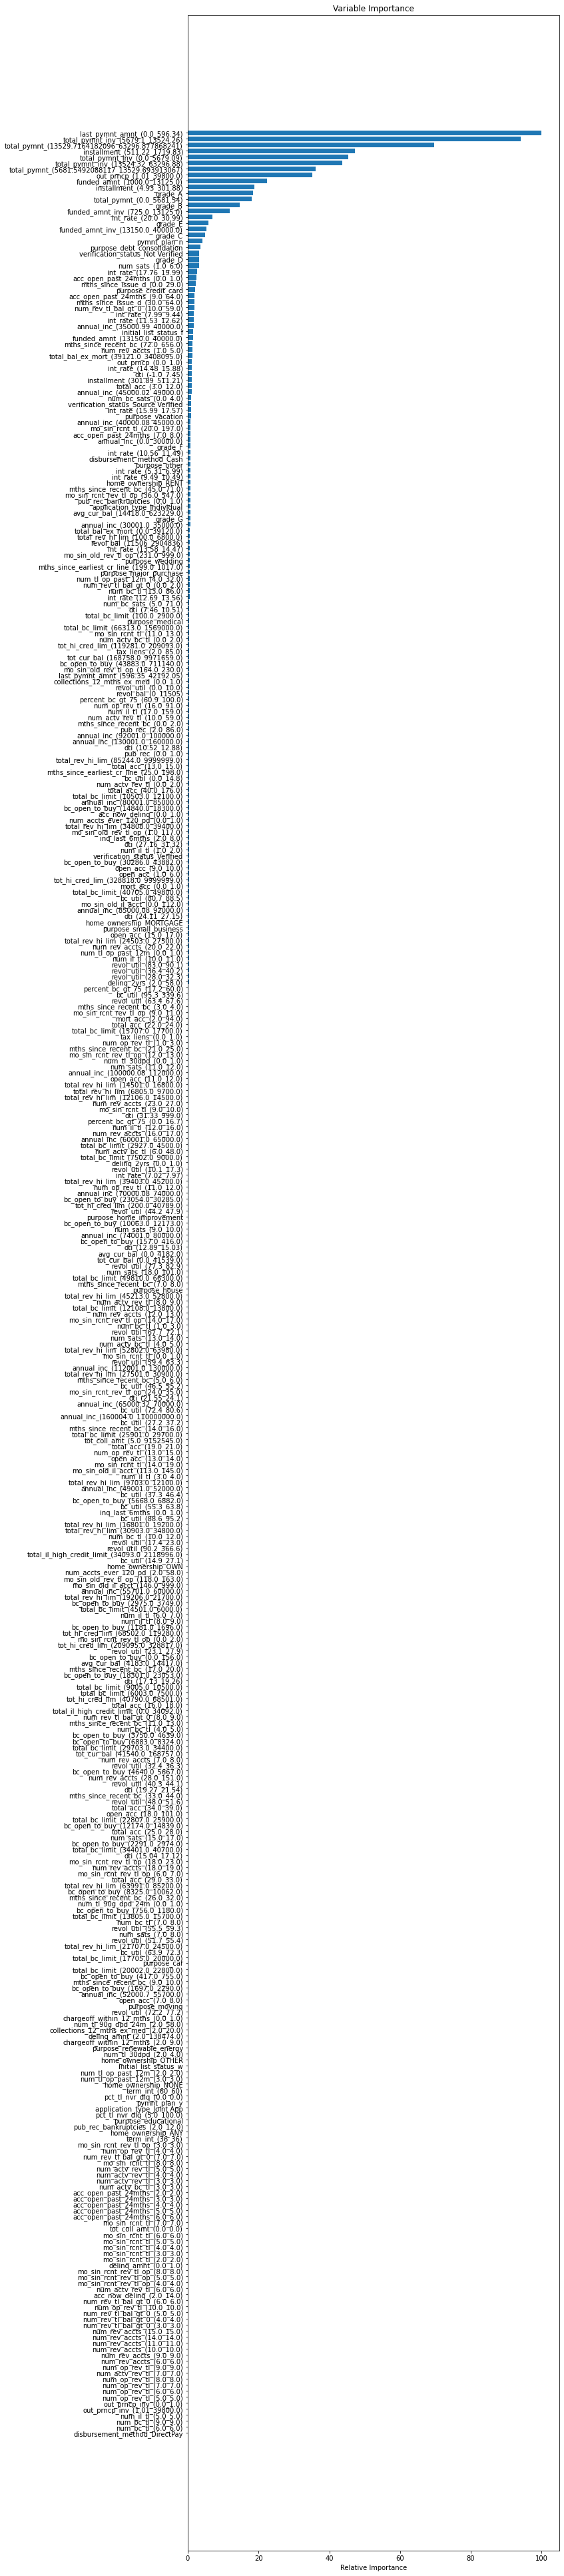

In [15]:
import matplotlib.pyplot as plt
feature_importance = xgb2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 70))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [17]:
import pickle

Pkl_Filename = "Pickle_XGB2_PD2_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb2, file)

In [18]:
from sklearn.naive_bayes import CategoricalNB 
clf = CategoricalNB()

clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.854
Accuracy on test set: 0.853


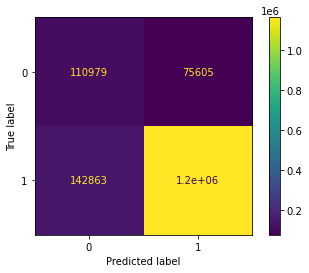

In [19]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(clf, X_train, y_train)
plt.show()

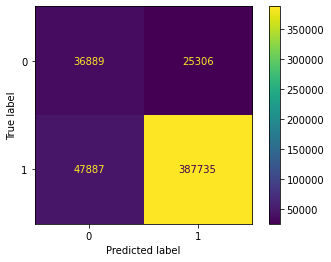

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [21]:
y_pred=clf.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.8758152811968337
Recall: 0.8529720760841836
F1 Score: 0.8623109090515944


In [ ]:
import pickle

Pkl_Filename = "Pickle_CNB_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)